In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("/content/sample_data/mnist_train_small.csv")

In [3]:
df.shape

(19999, 785)

In [4]:
df.dtypes

6        int64
0        int64
0.1      int64
0.2      int64
0.3      int64
         ...  
0.586    int64
0.587    int64
0.588    int64
0.589    int64
0.590    int64
Length: 785, dtype: object

In [6]:
!pip install tensorflow

In [8]:
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models

In [11]:
X = df.iloc[:, 1:].values.reshape(-1, 28, 28, 1) / 255.0
y = df.iloc[:, 0].values

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3),activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax'),
])

In [14]:
model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
200/200 [==============================] - 6s 7ms/step - loss: 0.4948 - accuracy: 0.8462 - val_loss: 0.1740 - val_accuracy: 0.9494
Epoch 2/5
200/200 [==============================] - 1s 5ms/step - loss: 0.1237 - accuracy: 0.9603 - val_loss: 0.1126 - val_accuracy: 0.9672
Epoch 3/5
200/200 [==============================] - 1s 5ms/step - loss: 0.0787 - accuracy: 0.9749 - val_loss: 0.1149 - val_accuracy: 0.9641
Epoch 4/5
200/200 [==============================] - 1s 5ms/step - loss: 0.0571 - accuracy: 0.9805 - val_loss: 0.0970 - val_accuracy: 0.9725
Epoch 5/5
200/200 [==============================] - 1s 7ms/step - loss: 0.0465 - accuracy: 0.9853 - val_loss: 0.0819 - val_accuracy: 0.9756


In [16]:
test_loss, test_acc = model.evaluate(X_test, y_test)

125/125 [==============================] - 1s 3ms/step - loss: 0.0737 - accuracy: 0.9760


In [17]:
print(f"the test accuracy is {test_acc}")

the test accuracy is 0.9760000109672546


125/125 [==============================] - 0s 2ms/step


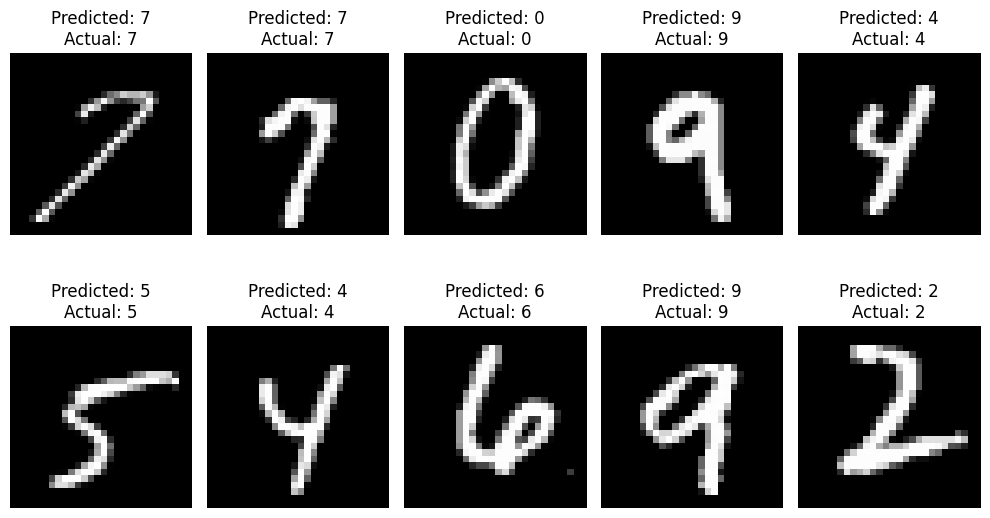

In [22]:
import matplotlib.pyplot as plt

predictions = model.predict(X_test)

plt.figure(figsize=(10, 6))
for i in range(10):
  plt.subplot(2, 5, i+1)
  plt.imshow(X_test[i].reshape (28,28), cmap='gray')
  plt.title(f"Predicted: {np.argmax(predictions[i])}\nActual: {y_test[i]}")
  plt.axis("off")

plt.tight_layout()
plt.show()